In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("bmi.csv")

In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
df.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [6]:
df['Index'].unique()

array([4, 2, 3, 5, 1, 0], dtype=int64)

In [7]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [9]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
gender= LabelEncoder()
df['Gender']= gender.fit_transform(df['Gender'])

In [15]:
df

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [16]:
bins=(-1,0,1,2,3,4,5,)
health = ['malnourished','underweight','fit', 'slightly overweight', 'overweight','extremly overweight']
df['Index']= pd.cut(df['Index'], bins=bins, labels=health)

In [18]:
df['Index']

0               overweight
1                      fit
2               overweight
3      slightly overweight
4      slightly overweight
              ...         
495    extremly overweight
496             overweight
497    extremly overweight
498    extremly overweight
499    extremly overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < 'slightly overweight' < 'overweight' < 'extremly overweight']

In [20]:
df['Index'].value_counts()

extremly overweight    198
overweight             130
fit                     69
slightly overweight     68
underweight             22
malnourished            13
Name: Index, dtype: int64

In [21]:
df['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

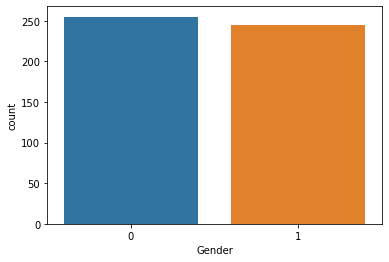

In [22]:
sns.countplot(x="Gender",data=df)

<AxesSubplot:xlabel='Index', ylabel='count'>

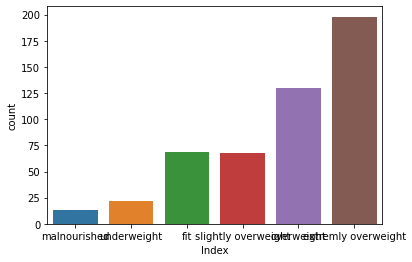

In [26]:
sns.countplot(df['Index'])

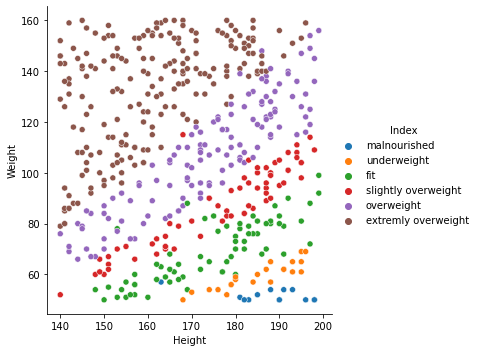

In [27]:
sns.relplot(x='Height', y="Weight", hue="Index", data=df)

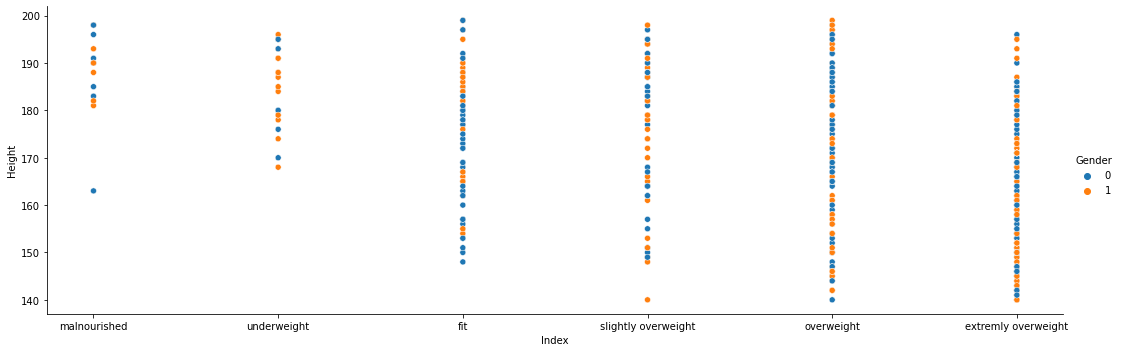

In [29]:
sns.relplot(x='Index', y="Height", hue="Gender", data=df, height= 5, aspect=3)

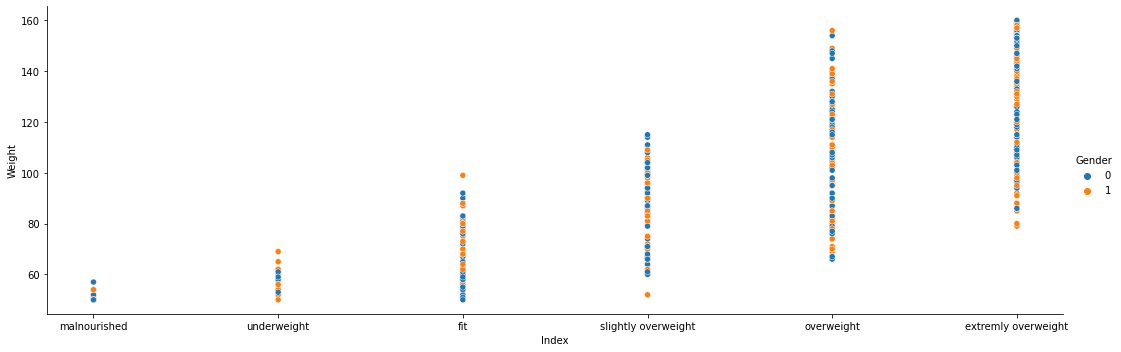

In [33]:
sns.relplot(x='Index', y="Weight", hue="Gender", data=df, height= 5, aspect=3)

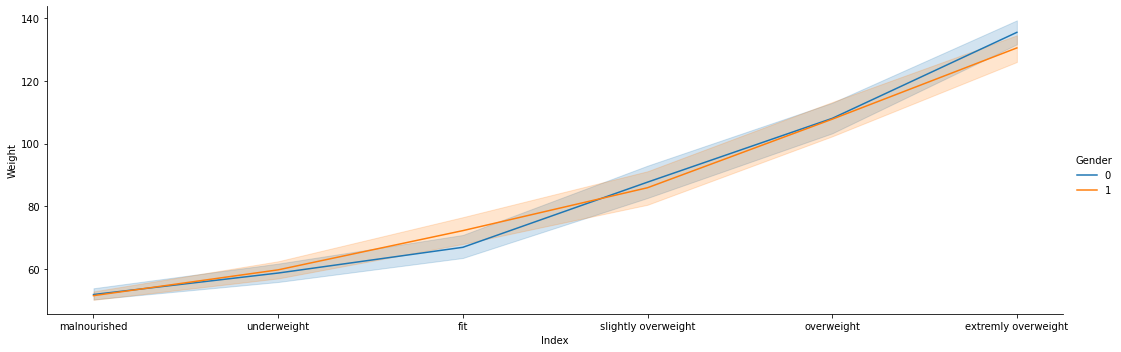

In [34]:
sns.relplot(x='Index', y="Weight", hue="Gender",kind='line', data=df, height= 5, aspect=3)

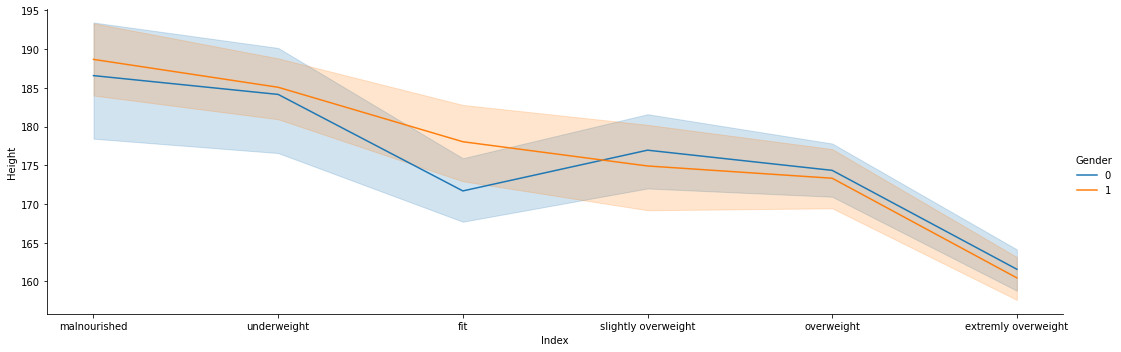

In [35]:
sns.relplot(x='Index', y="Height", hue="Gender",kind='line', data=df, height= 5, aspect=3)

In [36]:
X= df.drop('Index', axis=1)
y= df['Index']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [39]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [41]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)

In [43]:
print(classification_report(y_test,pred))

                     precision    recall  f1-score   support

extremly overweight       0.86      1.00      0.92        36
                fit       0.62      0.80      0.70        10
       malnourished       0.00      0.00      0.00         3
         overweight       1.00      0.78      0.88        32
slightly overweight       0.80      0.80      0.80        15
        underweight       0.60      0.75      0.67         4

           accuracy                           0.84       100
          macro avg       0.65      0.69      0.66       100
       weighted avg       0.83      0.84      0.83       100



In [44]:
print(confusion_matrix(y_test,pred))

[[36  0  0  0  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 6  0  0 25  1  0]
 [ 0  3  0  0 12  0]
 [ 0  1  0  0  0  3]]


In [45]:
print(accuracy_score(y_test,pred))

0.84


In [55]:
a=[[1,174,96]]
a=s.transform(a)
b = clf.predict(a)

In [56]:
b

array(['overweight'], dtype=object)

In [48]:
df

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
...,...,...,...,...
495,0,150,153,extremly overweight
496,0,184,121,overweight
497,0,141,136,extremly overweight
498,1,150,95,extremly overweight
